In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset_path = "./wpbc.data"

In [4]:
column_names = ['ID','Outcome','Time', 'Radius Mean', 'Texture Mean', 'Perimeter Mean',
       'Area Mean', 'Smoothness Mean', 'Compactness Mean', 'Concavity Mean',
       'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean',
       'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
       'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
       'Fractal Dimension SE', 'Radius Worst', 'Texture Worst',
       'Perimeter Worst', 'Area Worst', 'Smoothness Worst',
       'Compactness Worst', 'Concavity Worst', 'Concave Points Worst',
       'Symmetry Worst', 'Fractal Dimension Worst', 'Tumor Size', 'Lymph Node Status']

In [5]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", sep=",")

dataset = raw_dataset.copy()
dataset.head()

,ID,Outcome,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [6]:
dataset.isna().sum()

ID                         0
Outcome                    0
Time                       0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave Points Mean        0
Symmetry Mean              0
Fractal Dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave Points Worst       0
Symmetry Worst             0
Fractal Dimension Worst    0
Tumor Size                 0
Lymph Node Sta

In [7]:
dataset.shape

(198, 35)

In [8]:
dataset = dataset.dropna()

In [9]:
dataset = dataset[dataset['Outcome'] != 'N']

In [10]:
dataset.describe()

,ID,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.847088e+06,25.565217,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,...,151.332609,1635.767391,0.145341,0.357509,0.440004,0.183985,0.314017,0.088717,3.471739,4.869565
std,2.797389e+06,22.727030,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,...,32.417293,703.147215,0.019605,0.130614,0.147636,0.037977,0.061458,0.016784,2.029851,6.017045
min,8.620800e+04,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,...,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,8.559712e+05,9.000000,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,...,128.300000,1144.250000,0.129775,0.261950,0.323700,0.152850,0.269150,0.076930,2.350000,0.250000
50%,8.744275e+05,16.500000,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,...,145.700000,1481.000000,0.146800,0.352650,0.404900,0.183400,0.304950,0.086945,3.000000,2.000000
75%,9.084152e+05,36.750000,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,...,170.850000,1905.500000,0.160725,0.409550,0.533200,0.208500,0.340700,0.100197,4.000000,7.000000
max,9.111805e+06,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,...,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


In [11]:
dataset.shape

(46, 35)

In [12]:
dataset.describe()

,ID,Time,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,...,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst,Tumor Size,Lymph Node Status
count,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.847088e+06,25.565217,18.330870,21.758913,121.095217,1081.980435,0.103063,0.141606,0.161542,0.093113,...,151.332609,1635.767391,0.145341,0.357509,0.440004,0.183985,0.314017,0.088717,3.471739,4.869565
std,2.797389e+06,22.727030,3.365566,3.695717,22.910195,397.264721,0.010302,0.040692,0.062138,0.034361,...,32.417293,703.147215,0.019605,0.130614,0.147636,0.037977,0.061458,0.016784,2.029851,6.017045
min,8.620800e+04,1.000000,12.340000,14.340000,81.150000,477.400000,0.082170,0.067220,0.052530,0.033340,...,101.700000,733.200000,0.102100,0.120200,0.224900,0.118500,0.229300,0.060910,0.400000,0.000000
25%,8.559712e+05,9.000000,15.657500,19.067500,103.900000,799.875000,0.094077,0.113375,0.111025,0.067740,...,128.300000,1144.250000,0.129775,0.261950,0.323700,0.152850,0.269150,0.076930,2.350000,0.250000
50%,8.744275e+05,16.500000,18.825000,21.365000,123.550000,1090.000000,0.103350,0.133350,0.164700,0.088235,...,145.700000,1481.000000,0.146800,0.352650,0.404900,0.183400,0.304950,0.086945,3.000000,2.000000
75%,9.084152e+05,36.750000,20.262500,24.162500,133.425000,1278.500000,0.111875,0.166000,0.207525,0.108375,...,170.850000,1905.500000,0.160725,0.409550,0.533200,0.208500,0.340700,0.100197,4.000000,7.000000
max,9.111805e+06,78.000000,27.220000,30.990000,182.100000,2250.000000,0.121500,0.236300,0.336800,0.191300,...,232.200000,3903.000000,0.185100,0.744400,0.734500,0.275600,0.488200,0.134100,10.000000,27.000000


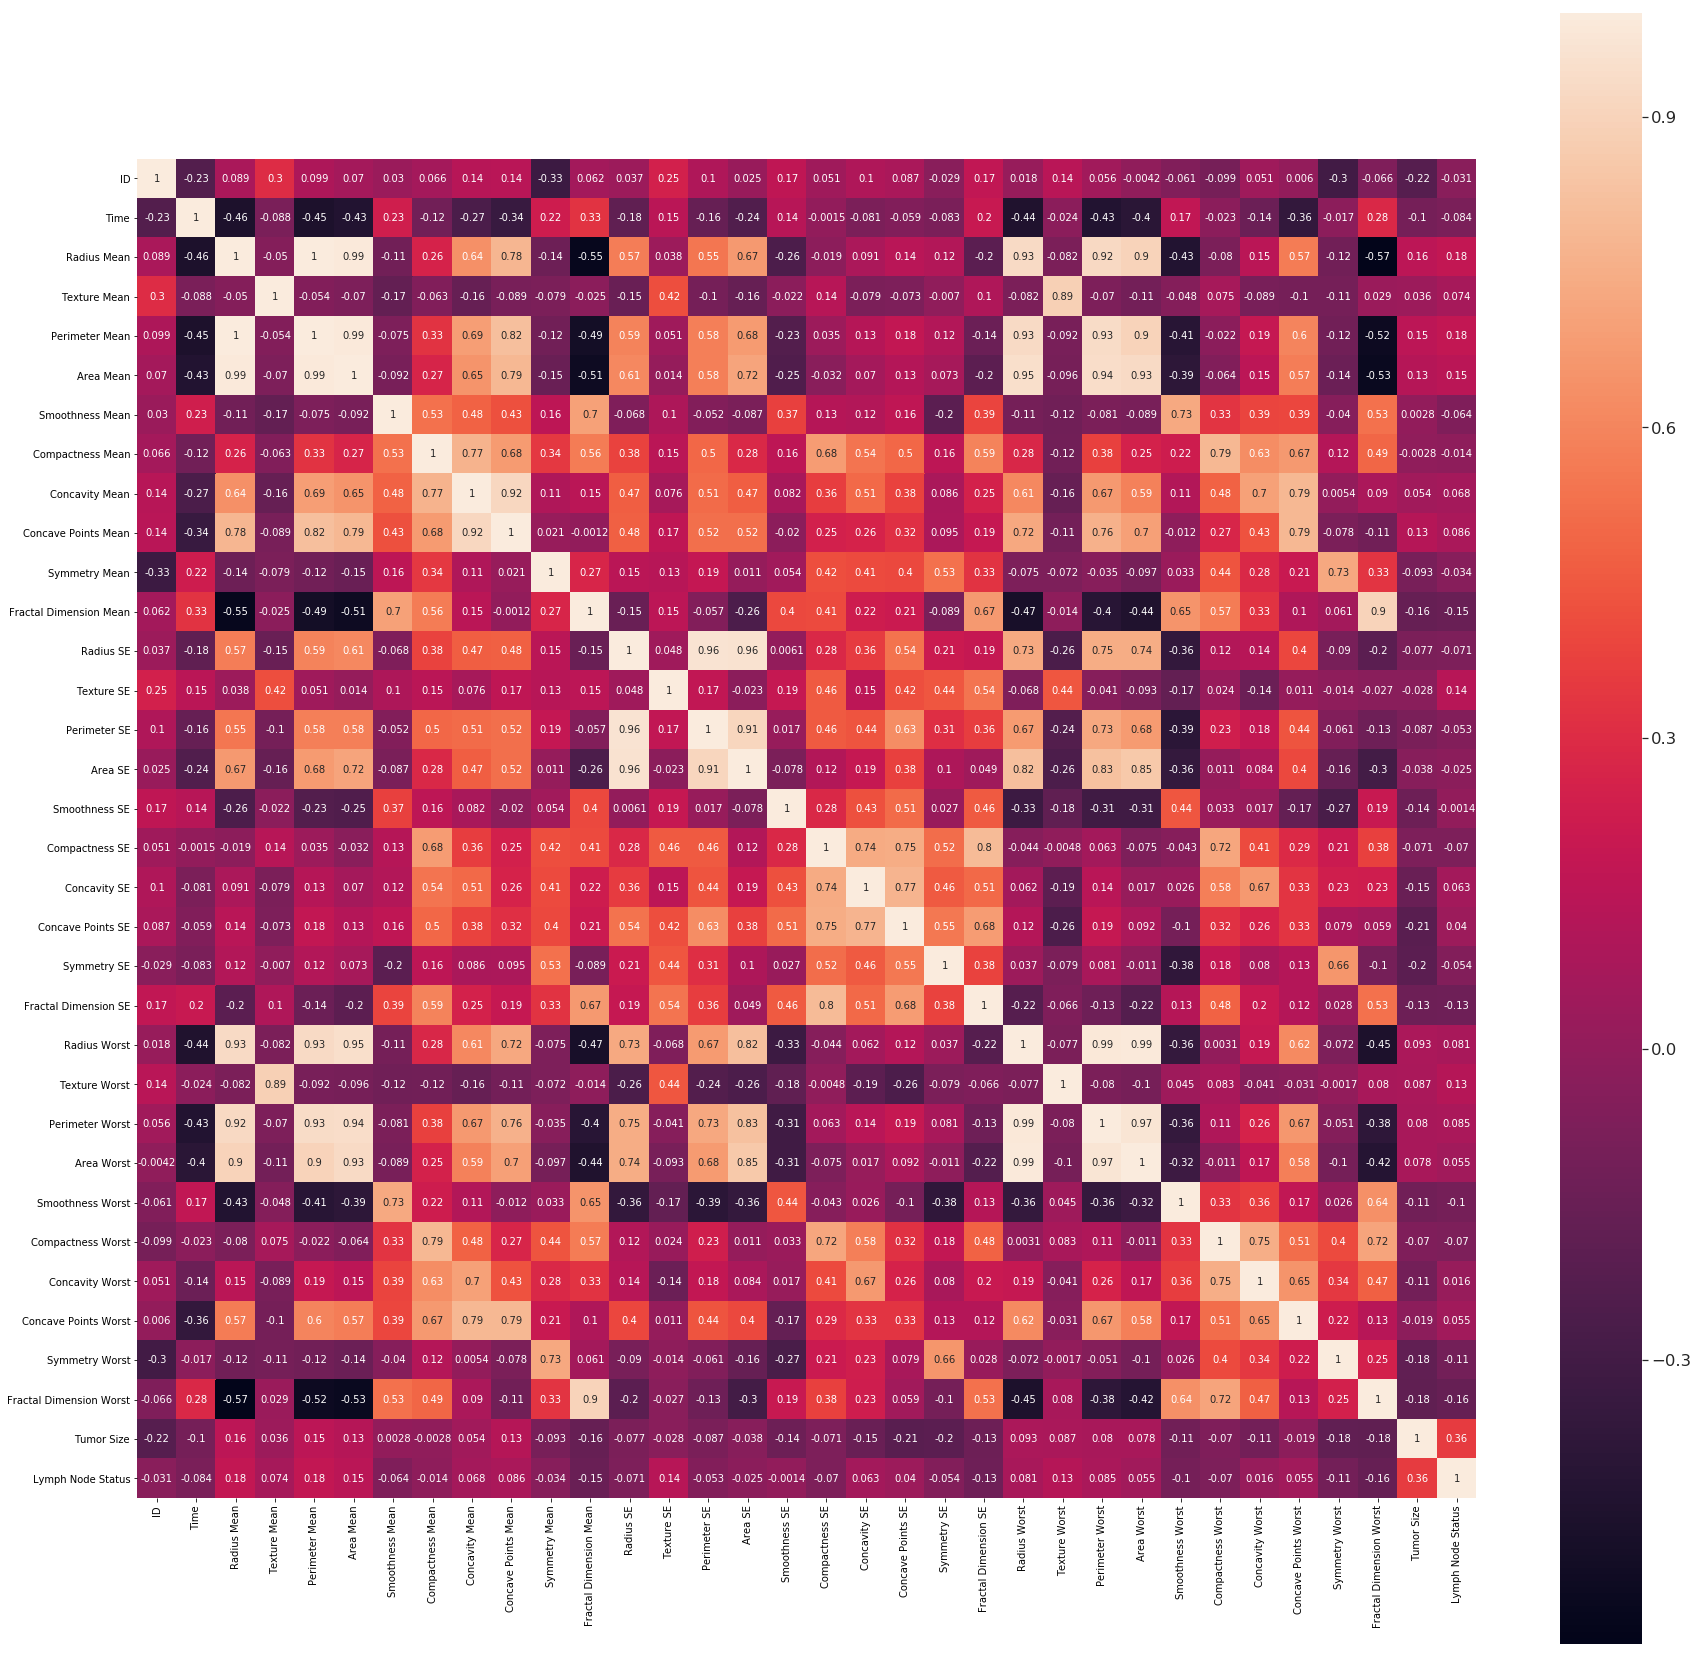

In [13]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.savefig("Correlation.png")

In [14]:
plt.savefig("Correlation Original Dataset.jpg")

<Figure size 432x288 with 0 Axes>

In [15]:
drop_list = ['Texture Mean', 'Perimeter Mean', 'Area Mean','Compactness Mean', 'Smoothness Mean', 'Concavity Mean', 'Symmetry Mean',
             'Radius SE','Perimeter SE', 'Area SE', 'Texture SE', 'Compactness SE', 'Smoothness SE', 'Concavity SE', 'Concave Points SE', 'Fractal Dimension SE', 'Symmetry SE',
             'Area Worst','Perimeter Worst','Compactness Worst', 'Concavity Worst', 'Fractal Dimension Worst', 'Symmetry Worst',
             'Concave Points Worst','Texture Worst','Lymph Node Status', 'Tumor Size']
feature_dataset = dataset.drop(drop_list,axis = 1 )
feature_dataset.head()

,ID,Outcome,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
4,843584,R,27,20.29,0.10430,0.05883,22.54,0.1374
5,843786,R,77,12.75,0.07666,0.07164,15.51,0.1706
7,844582,R,77,13.71,0.05985,0.07451,17.06,0.1654
13,847990,R,36,14.54,0.07364,0.07077,17.46,0.1678
15,848620,R,10,16.13,0.10280,0.07356,20.96,0.1789


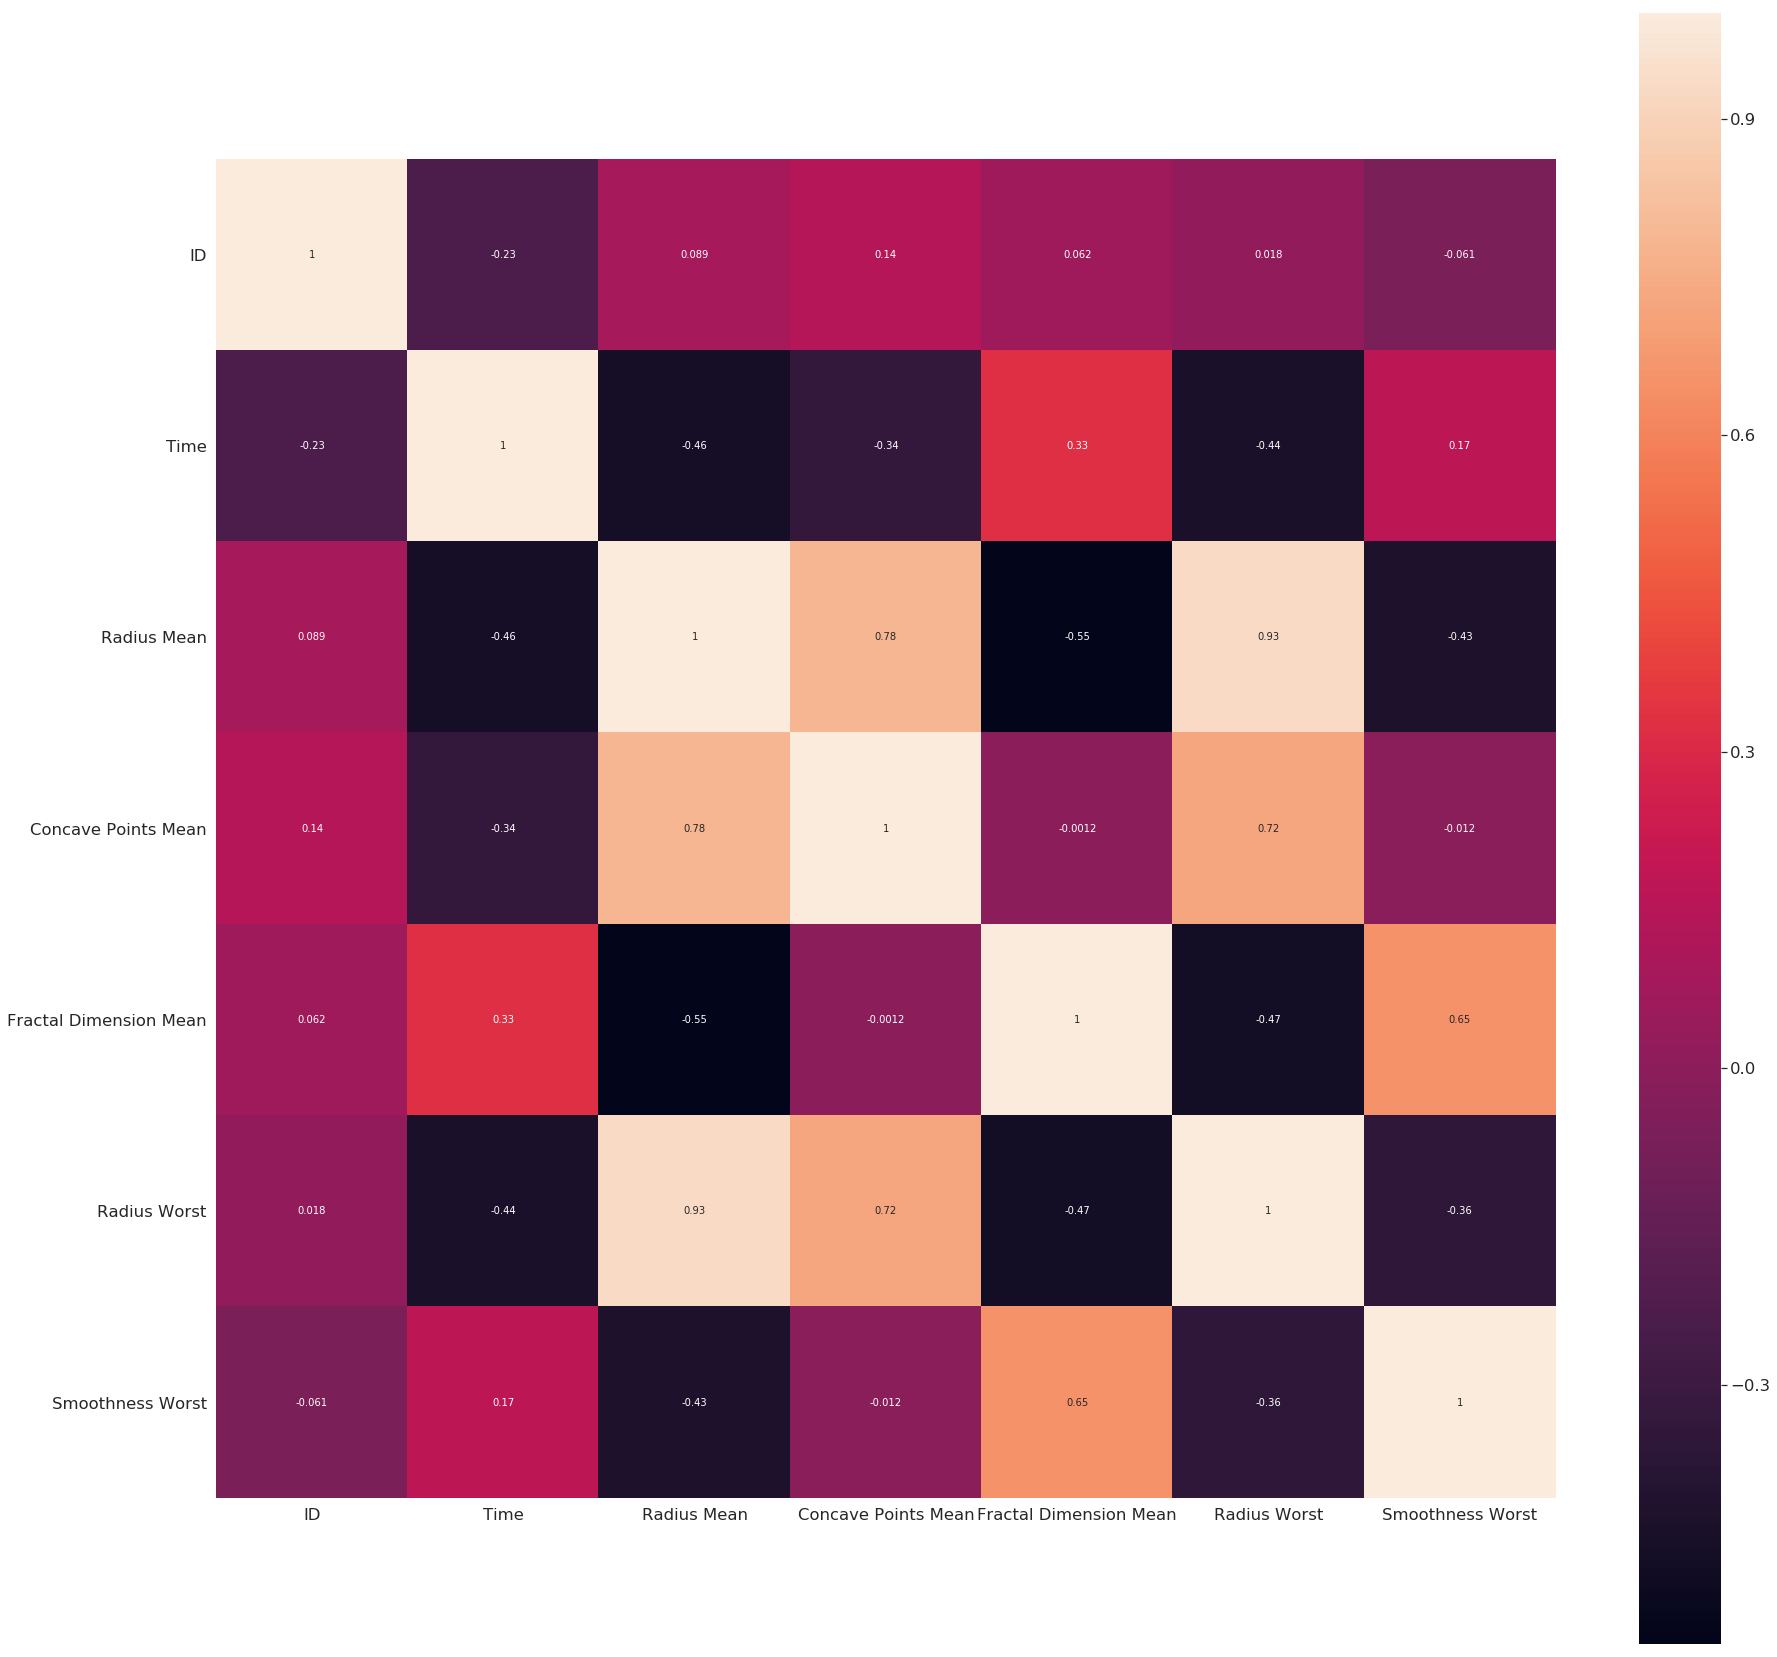

In [16]:
fig = plt.subplots(figsize = (30, 30))
sns.set(font_scale=1.5)
sns.heatmap(feature_dataset.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.savefig("Correlation Dropped.png")

In [17]:
feature_dataset = feature_dataset.drop('Outcome', 1)
feature_dataset = feature_dataset.drop('ID', 1)

In [18]:
feature_dataset.head()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
4,27,20.29,0.10430,0.05883,22.54,0.1374
5,77,12.75,0.07666,0.07164,15.51,0.1706
7,77,13.71,0.05985,0.07451,17.06,0.1654
13,36,14.54,0.07364,0.07077,17.46,0.1678
15,10,16.13,0.10280,0.07356,20.96,0.1789


In [19]:
feature_dataset.describe()

,Time,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,25.565217,18.330870,0.093113,0.061176,22.670435,0.145341
std,22.727030,3.365566,0.034361,0.006298,4.703678,0.019605
min,1.000000,12.340000,0.033340,0.050250,15.510000,0.102100
25%,9.000000,15.657500,0.067740,0.056365,19.542500,0.129775
50%,16.500000,18.825000,0.088235,0.060795,21.890000,0.146800
75%,36.750000,20.262500,0.108375,0.065240,24.870000,0.160725
max,78.000000,27.220000,0.191300,0.074510,35.130000,0.185100


In [20]:
y = feature_dataset.pop('Time')
from sklearn_pandas import DataFrameMapper


In [21]:
mapper = DataFrameMapper([(feature_dataset.columns, StandardScaler())])
scaled_features = mapper.fit_transform(feature_dataset.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=feature_dataset.index, columns=feature_dataset.columns)

In [22]:
scaled_features_df.head()

,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
4,0.588543,0.329173,-0.376606,-0.028037,-0.409543
5,-1.676550,-0.484126,1.679913,-1.539127,1.302623
7,-1.388156,-0.978756,2.140663,-1.205956,1.034453
13,-1.138816,-0.572989,1.540243,-1.119977,1.158224
15,-0.661163,0.285036,1.988150,-0.367656,1.730665


In [31]:
scaled_features_df.describe()

,Radius Mean,Concave Points Mean,Fractal Dimension Mean,Radius Worst,Smoothness Worst
count,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01
mean,-9.814010e-16,5.309762e-17,-4.489163e-16,3.016910e-16,1.839109e-15
std,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00
min,-1.799718e+00,-1.758806e+00,-1.754040e+00,-1.539127e+00,-2.230010e+00
25%,-8.031072e-01,-7.465950e-01,-7.723375e-01,-6.723460e-01,-8.027743e-01
50%,1.484418e-01,-1.435351e-01,-6.114484e-02,-1.677536e-01,7.522681e-02
75%,5.802813e-01,4.490790e-01,6.524560e-01,4.727940e-01,7.933569e-01
max,2.670385e+00,2.889125e+00,2.140663e+00,2.678169e+00,2.050407e+00


In [23]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df, y, test_size=0.2, random_state=42)

In [24]:
regr = linear_model.LinearRegression()

In [25]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regr.predict(x_test)

In [27]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.82501632 -3.19580932  4.76166893 -8.20279138 -2.45465353]
Mean squared error: 247.95
Variance score: 0.02


In [33]:
np.array(y_test)

array([ 9, 12, 37, 14, 49])

In [29]:
y_pred

array([22.42375352, 30.02297984, 24.31086939, 27.29692262, 29.07781659])